# Day02-图片数据建模流程范例

In [7]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
from typing import List, Dict, Tuple

BATCH_SIZE = 100

def load_image(img_path: str, size=(32, 32)) -> tuple:
    '''
    if tf.strings.regex_full_match(img_path, ".*/automobile/.*"):
        label = tf.constant(1, tf.int8)
    else:
        label = tf.constant(0, tf.int8)
    '''
    label = tf.constant(1,tf.int8) if tf.strings.regex_full_match(img_path,".*/automobile/.*") \
            else tf.constant(0,tf.int8)
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, size) / 255.0
    return (img, label)

In [8]:
# 并行化预处理和预存数据
ds_train = tf.data.Dataset.list_files("./data/cifar2/train/*/*.jpg") \
    .map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE) \
    .shuffle(buffer_size=1000).batch(BATCH_SIZE) \
    .prefetch(tf.data.experimental.AUTOTUNE)

ds_test = tf.data.Dataset.list_files("./data/cifar2/test/*/*.jpg") \
    .map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE) \
    .batch(BATCH_SIZE) \
    .prefetch(tf.data.experimental.AUTOTUNE)

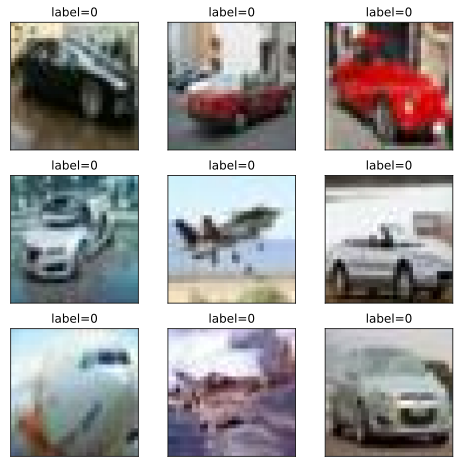

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = "svg"

# 查看部分样本
from matplotlib import pyplot as plt

plt.figure(figsize=(8,8))
for i, (img, label) in enumerate(ds_train.unbatch().take(9)):
    ax = plt.subplot(3, 3, i + 1)
    ax.imshow(img.numpy())
    ax.set_title("label=%d"%label)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()